In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('datasets/train.csv', on_bad_lines='skip')
test_df = pd.read_csv('datasets/test.csv', on_bad_lines='skip')
val_df = pd.read_csv('datasets/val.csv', on_bad_lines='skip')

In [4]:
train_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [6]:
test_df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184,22,Male,Twitter,70,1,20,5,22,Neutral
99,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,708,24,Non-binary,Facebook,110,6,35,23,25,Sadness
101,993,24,Male,Telegram,75,3,37,16,22,Neutral


In [7]:
train_df[train_df.isnull().any(axis = 1)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
641,Tabii,işte mevcut veri kümesini 1000 satıra tamamlı...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_df.dropna(inplace = True)

In [9]:
test_df[test_df.isnull().any(axis = 1)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion


In [11]:
test_df["Dominant_Emotion"].unique()

array(['Neutral', 'Anxiety', 'Happiness', 'Boredom', 'Sadness', 'Anger'],
      dtype=object)

In [12]:
val_df[val_df.isnull().any(axis = 1)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
91,27,Non-binary,Facebook,55,1,9,2,11,Anxiety,NaN


In [13]:
val_df.dropna(inplace = True)

In [14]:
val_df["Dominant_Emotion"].unique()

array(['Happiness', 'Sadness', 'Anxiety', 'Boredom', 'Neutral', 'Anger',
       'Agression'], dtype=object)

In [13]:
gender_categories = train_df['Gender'].nunique()
gender_categories

18

In [14]:
train_invalid_rows = train_df[train_df['Gender'].str.isnumeric() | (train_df['Age'].astype(str).str.isalpha())]
train_invalid_rows.head(10)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,251,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,252,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,253,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,254,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,255,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
255,256,Female,22,Whatsapp,70.0,2.0,42.0,10.0,21.0,Anxiety
256,257,Male,25,Telegram,90.0,3.0,22.0,11.0,22.0,Boredom
257,258,Non-binary,29,Snapchat,50.0,2.0,18.0,7.0,18.0,Sadness
258,259,Female,28,Twitter,95.0,4.0,48.0,22.0,25.0,Happiness
259,260,Male,27,Facebook,60.0,1.0,12.0,5.0,15.0,Boredom


In [15]:
test_invalid_rows = test_df[test_df['Gender'].str.isnumeric() | (test_df['Age'].astype(str).str.isalpha())]
test_invalid_rows

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
46,651,Male,27,Instagram,165,6,85,30,28,Happiness


In [16]:
val_invalid_rows = val_df[val_df['Gender'].str.isnumeric() | (val_df['Age'].astype(str).str.isalpha())]
val_invalid_rows

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
14,752,Female,24,Twitter,75,3,33,18,19,Anger
57,537,Female,33,Snapchat,190,7,82,21,28,Happiness
59,683,Female,34,Instagram,105,7,42,16,31,Anger
60,372,Male,28,Twitter,100,4,23,19,20,Neutral
63,352,Female,24,Twitter,72,3,42,19,40,Anger
65,590,Male,28,Facebook,40,6,21,11,15,Anxiety
68,13,Male,34,Instagram,75,6,30,11,23,Sadness
70,613,Female,22,LinkedIn,90,10,12,5,11,Neutral
75,524,Female,26,Instagram,90,3,39,10,21,Neutral
76,105,Male,33,LinkedIn,30,1,10,9,14,Boredom


In [17]:
def fix_swapped_entries(row):
    if row['Gender'].isnumeric() or row['Age'].isalpha():
        row['Gender'], row['Age'] = row['Age'], row['Gender']
    return row
    
fixed_invalid_entries = train_invalid_rows.apply(fix_swapped_entries, axis = 1)
fixed_test_invalid_entries = test_invalid_rows.apply(fix_swapped_entries, axis = 1)
fixed_val_invalid_entries = val_invalid_rows.apply(fix_swapped_entries,axis = 1)

In [18]:
train_df.update(fixed_invalid_entries)

In [19]:
train_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [20]:
test_df.update(fixed_test_invalid_entries)
test_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [21]:
val_df.update(fixed_val_invalid_entries)
val_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety


In [22]:
train_invalid_rows = train_df[train_df['Gender'].str.isnumeric() | (train_df['Age'].astype(str).str.isalpha())]
train_invalid_rows

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion


In [23]:
test_invalid_rows = test_df[test_df['Gender'].str.isnumeric() | (test_df['Age'].astype(str).str.isalpha())]
test_invalid_rows

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion


In [24]:
val_invalid_rows = val_df[val_df['Gender'].str.isnumeric() | (val_df['Age'].astype(str).str.isalpha())]
val_invalid_rows

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion


In [25]:
sorted_df = train_df.sort_values(by='Age')
sorted_df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
934,934,21,Female,Instagram,130.0,6.0,95.0,22.0,28.0,Sadness
505,506,21,Male,Instagram,150.0,5.0,65.0,25.0,30.0,Happiness
346,347,21,Female,Twitter,90.0,3.0,37.0,14.0,20.0,Sadness
788,788,21,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
415,416,21,Non-binary,Facebook,40.0,1.0,10.0,4.0,12.0,Neutral
...,...,...,...,...,...,...,...,...,...,...
44,45,35,Female,LinkedIn,60.0,1.0,12.0,5.0,14.0,Boredom
597,598,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
344,345,35,Female,LinkedIn,60.0,1.0,15.0,7.0,14.0,Boredom
244,245,35,Female,LinkedIn,60.0,1.0,15.0,7.0,14.0,Boredom


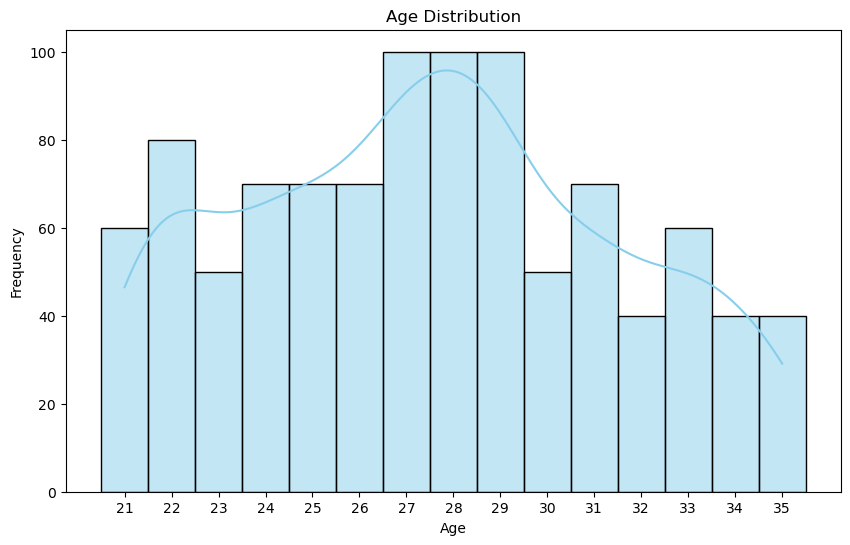

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(sorted_df['Age'], kde=True, bins = 30, color="skyblue")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

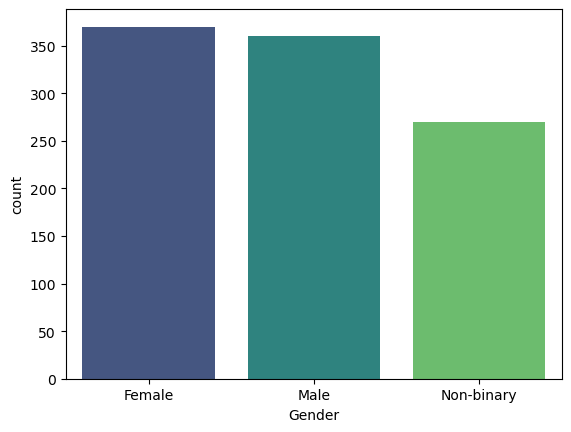

In [27]:
sns.countplot(x = "Gender", data = sorted_df, hue = "Gender", palette = "viridis")

In [29]:
train_df['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

<Axes: xlabel='Age', ylabel='Daily_Usage_Time (minutes)'>

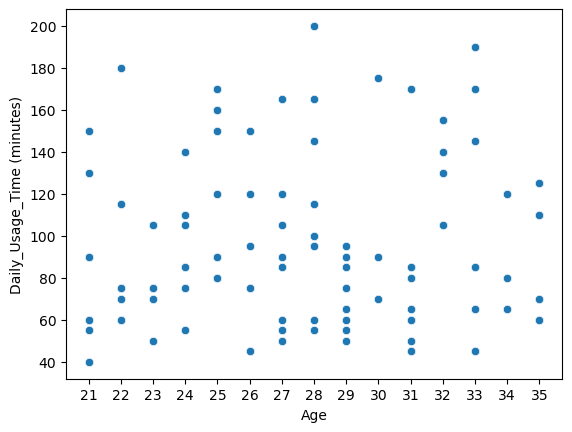

In [30]:
sns.scatterplot(data = sorted_df, x = sorted_df['Age'], y = sorted_df['Daily_Usage_Time (minutes)'])

<Axes: xlabel='Platform', ylabel='count'>

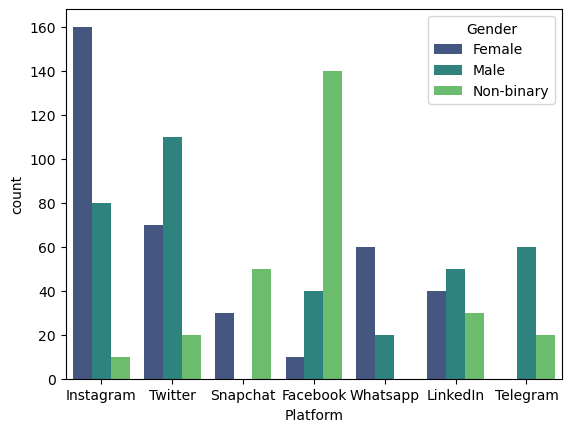

In [31]:
sns.countplot(x = "Platform", data = sorted_df, hue = "Gender", palette = "viridis")

<Axes: xlabel='Dominant_Emotion', ylabel='count'>

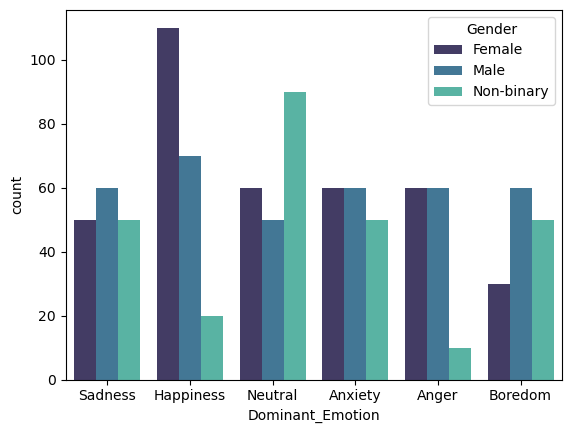

In [32]:
sns.countplot(x = "Dominant_Emotion", data = sorted_df, hue = "Gender", palette = "mako")

<Axes: xlabel='Daily_Usage_Time (minutes)', ylabel='Gender'>

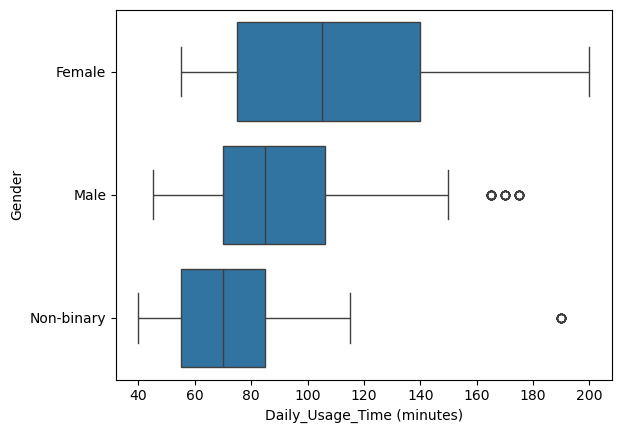

In [33]:
sns.boxplot(data = sorted_df, x = sorted_df['Daily_Usage_Time (minutes)'], y = sorted_df['Gender'])

C:\Users\samra\AppData\Local\Temp\ipykernel_17264\2936512412.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = sorted_df, x = sorted_df['Age'], palette = "magma")


<Axes: xlabel='Age'>

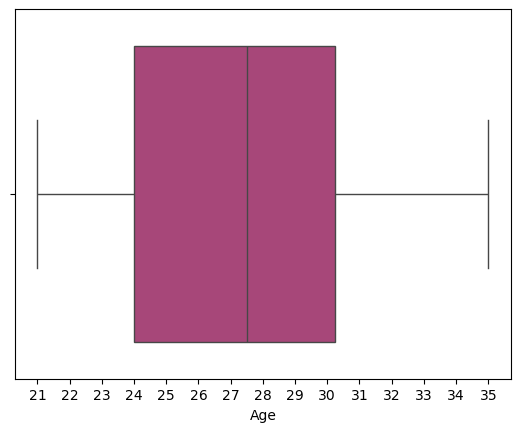

In [34]:
sns.boxplot(data = sorted_df, x = sorted_df['Age'], palette = "magma")

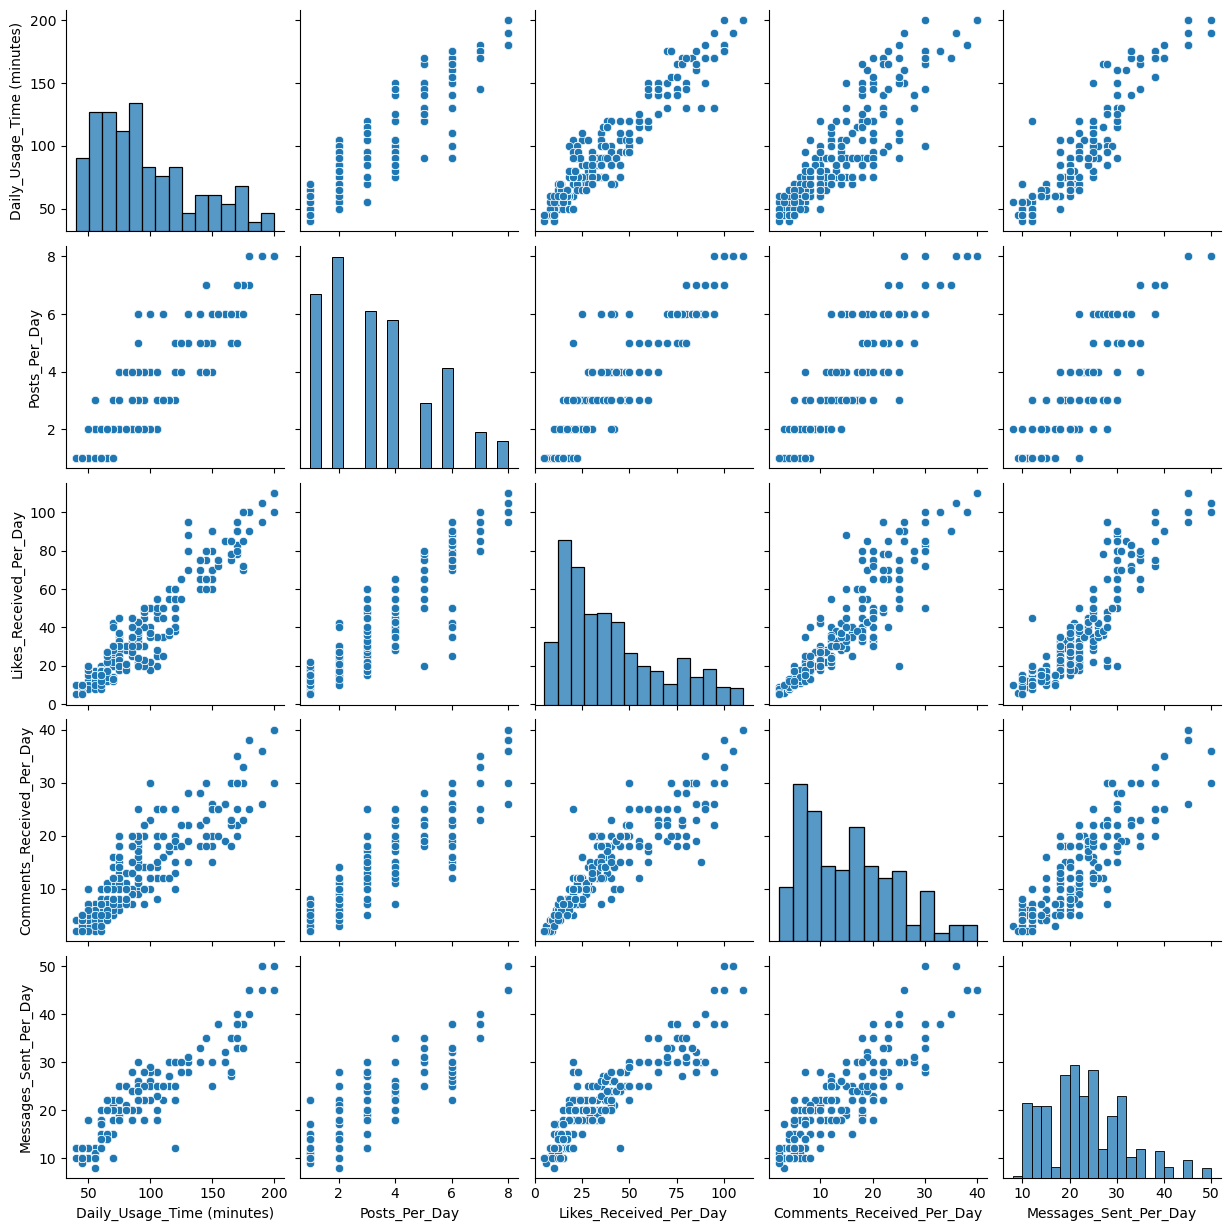

In [35]:
sns.pairplot(data = sorted_df)

<Axes: xlabel='Dominant_Emotion', ylabel='Daily_Usage_Time (minutes)'>

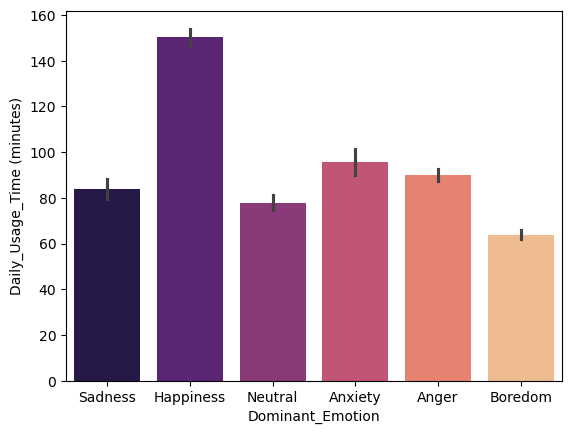

In [36]:
sns.barplot(data = sorted_df, x = sorted_df['Dominant_Emotion'], y = sorted_df['Daily_Usage_Time (minutes)'],  hue='Dominant_Emotion',palette = "magma",)

<Axes: xlabel='Platform', ylabel='Daily_Usage_Time (minutes)'>

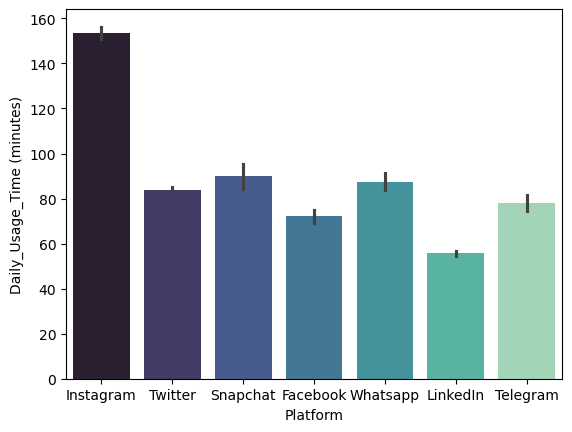

In [37]:
sns.barplot(data = sorted_df, x = sorted_df['Platform'], y = sorted_df['Daily_Usage_Time (minutes)'], palette = "mako", hue="Platform")

In [38]:
train_df.to_csv('final_train_df.csv',index = True)
test_df.to_csv('final_test_df.csv', index = True)
val_df.to_csv('final_val_df.csv', index = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
train_df = pd.get_dummies(sorted_df, columns = ["Gender", "Platform"], drop_first = True)

In [ ]:
output_label = train_df['Dominant_Emotion']
label_encoder.fit(output_label)